# Ilmaandmete Analüüs - Aegridade Töötlemine

See notebook tutvustab ilmaandmete analüüsi pandas, numpy ja matplotlib vaatevinklist.

## Keskkonna seadistamine

Enne notebook'i käivitamist loo conda keskkond:

```bash
# 1. Loo uus conda keskkond Python 3.11-ga
conda create -n andmeteadus python=3.11

# 2. Aktiveeri keskkond
conda activate andmeteadus

# 3. Paigalda teegid requirements.txt failist
pip install -r requirements.txt

# 4. Kontrolli paigaldust
python -c "import pandas, numpy, matplotlib; print('Kõik teegid on paigaldatud!')"
```

**Või kasuta environment.yml faili:**
```bash
# Loo keskkond environment.yml failist
conda env create -f environment.yml
conda activate andmeteadus
```

## Ülesanded:
1. Ilmaandmete laadimine CSV failist
2. Aegridade sorteerimine ja puhastamine
3. Ilmaandmete visualiseerimine
4. Aegridade analüüs ja trendide leidmine
5. Statistilised analüüsid


## 1. Vajalike teekide importimine


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Seaborn stiili seadistamine
sns.set_style("whitegrid")

# Matplotlib eestikeelne font
plt.rcParams['font.family'] = 'DejaVu Sans'

print("Teegid on edukalt imporditud!")
print(f"Pandas versioon: {pd.__version__}")
print(f"NumPy versioon: {np.__version__}")


Teegid on edukalt imporditud!
Pandas versioon: 2.2.3
NumPy versioon: 1.26.4


## 2. Ilmaandmete laadimine ja esmane vaatlus


In [2]:
# Laadi ilmaandmed CSV failist
df = pd.read_csv('ilmaandmed_näidis.csv')

# Vaata andmete ülevaadet
print("Ilmaandmete mõõtmed:", df.shape)
print("\nAndmete esimised 10 rida:")
df.head(10)


Ilmaandmete mõõtmed: (168, 8)

Andmete esimised 10 rida:


,kuupäev,kellaaeg,temperatuur,õhuniiskus,tuule_kiirus,tuule_suund,atmosfääri_rõhk,sademed
0,2024-01-15,00:00,2.5,85,12,SW,1013.2,0.0
1,2024-01-15,01:00,2.1,87,11,SW,1012.8,0.0
2,2024-01-15,02:00,1.8,89,10,SW,1012.5,0.0
3,2024-01-15,03:00,1.5,91,9,SW,1012.1,0.0
4,2024-01-15,04:00,1.2,93,8,SW,1011.8,0.0
5,2024-01-15,05:00,0.9,95,7,SW,1011.4,0.0
6,2024-01-15,06:00,0.7,96,6,SW,1011.0,0.0
7,2024-01-15,07:00,0.8,94,7,SW,1010.8,0.0
8,2024-01-15,08:00,1.2,92,8,SW,1010.5,0.0
9,2024-01-15,09:00,2.1,89,9,SW,1010.2,0.0


In [3]:
# Andmete info ja kirjeldus
print("Andmete info:")
df.info()

print("\nAndmete kirjeldus:")
df.describe()


Andmete info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   kuupäev          168 non-null    object 
 1   kellaaeg         168 non-null    object 
 2   temperatuur      168 non-null    float64
 3   õhuniiskus       168 non-null    int64  
 4   tuule_kiirus     168 non-null    int64  
 5   tuule_suund      168 non-null    object 
 6   atmosfääri_rõhk  168 non-null    float64
 7   sademed          168 non-null    float64
dtypes: float64(3), int64(2), object(3)
memory usage: 10.6+ KB

Andmete kirjeldus:


,temperatuur,õhuniiskus,tuule_kiirus,atmosfääri_rõhk,sademed
count,168.000000,168.000000,168.000000,168.000000,168.0
mean,2.020238,89.744048,6.928571,987.760714,0.0
std,2.556184,8.648836,4.120304,14.610406,0.0
min,-2.000000,72.000000,0.000000,962.700000,0.0
25%,0.000000,82.000000,3.750000,975.225000,0.0
50%,1.400000,92.000000,7.000000,987.750000,0.0
75%,4.225000,97.250000,10.000000,1000.275000,0.0
max,7.500000,100.000000,15.000000,1013.200000,0.0


## 3. Aegridade ettevalmistamine


In [4]:
# Loo datetime veerg kuupäeva ja kellaaja kombineerimisega
df['datetime'] = pd.to_datetime(df['kuupäev'] + ' ' + df['kellaaeg'])

# Seadista datetime indeksiks
df = df.set_index('datetime')

# Eemalda vanad kuupäeva ja kellaaja veerud
df = df.drop(['kuupäev', 'kellaaeg'], axis=1)

print("Aegrida on ettevalmistatud!")
print("Uued veerud:", df.columns.tolist())
print("\nEsimene ja viimane mõõtmine:")
print("Esimene:", df.index[0])
print("Viimane:", df.index[-1])
print("Kokku mõõtmisi:", len(df))


Aegrida on ettevalmistatud!
Uued veerud: ['temperatuur', 'õhuniiskus', 'tuule_kiirus', 'tuule_suund', 'atmosfääri_rõhk', 'sademed']

Esimene ja viimane mõõtmine:
Esimene: 2024-01-15 00:00:00
Viimane: 2024-01-21 23:00:00
Kokku mõõtmisi: 168


In [5]:
# Kontrolli puuduvaid väärtusi
print("Puuduvad väärtused:")
print(df.isnull().sum())

# Kontrolli duplikaate
print(f"\nDuplikaatide arv: {df.duplicated().sum()}")

# Vaata andmete tüüpe
print("\nAndmete tüübid:")
print(df.dtypes)

# Vaata tuule suundade unikaalseid väärtusi
print(f"\nTuule suunad: {df['tuule_suund'].unique()}")

# Loo tuule suuna numbriline kodeering (valikuline)
# wind_direction_map = {'N': 0, 'NE': 45, 'E': 90, 'SE': 135, 'S': 180, 'SW': 225, 'W': 270, 'NW': 315}
# df['tuule_suund_num'] = df['tuule_suund'].map(wind_direction_map)


Puuduvad väärtused:
temperatuur        0
õhuniiskus         0
tuule_kiirus       0
tuule_suund        0
atmosfääri_rõhk    0
sademed            0
dtype: int64

Duplikaatide arv: 0

Andmete tüübid:
temperatuur        float64
õhuniiskus           int64
tuule_kiirus         int64
tuule_suund         object
atmosfääri_rõhk    float64
sademed            float64
dtype: object

Tuule suunad: ['SW']


## 4. Ilmaandmete visualiseerimine


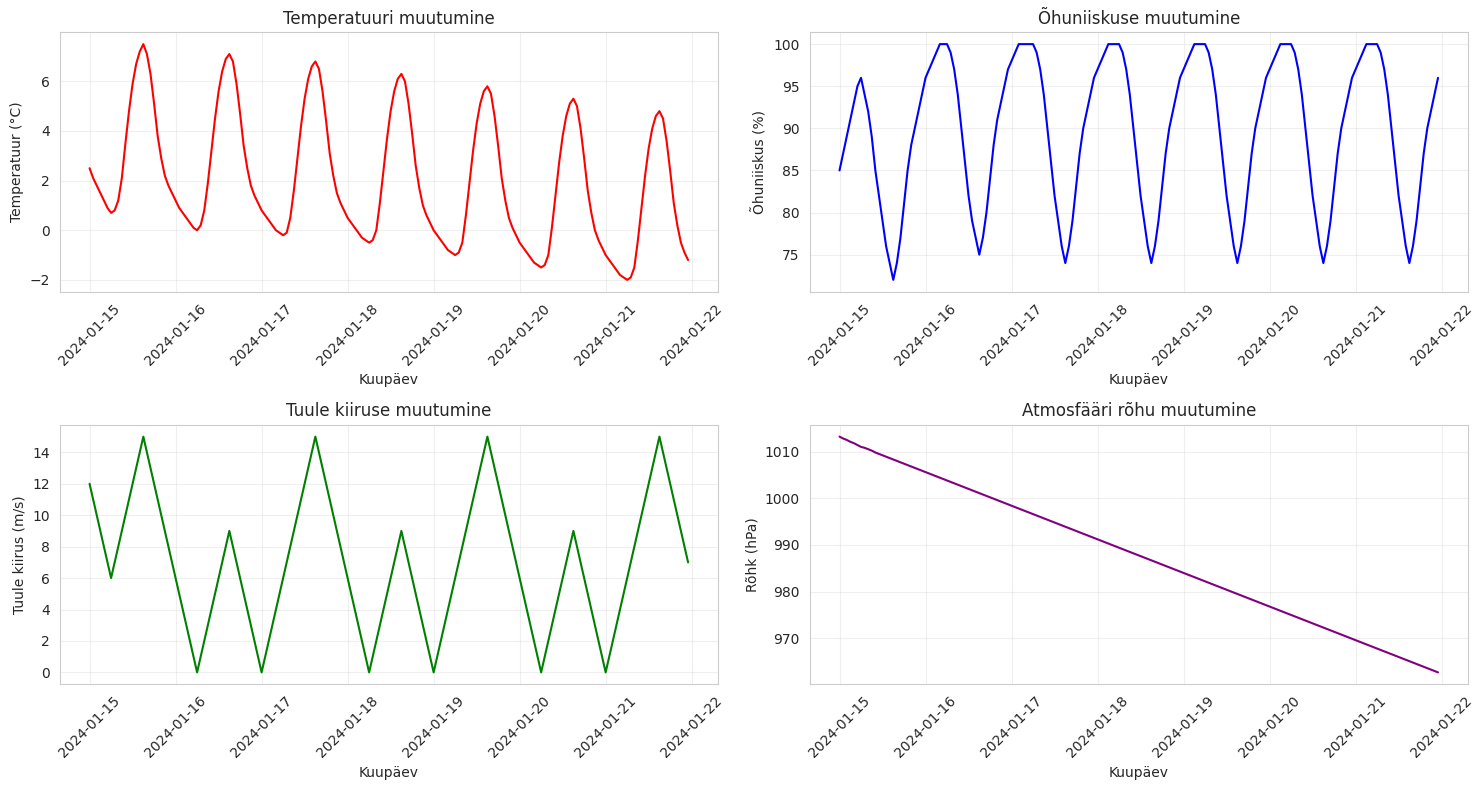

In [6]:
# Temperatuuri aegrida
plt.figure(figsize=(15, 8))

plt.subplot(2, 2, 1)
plt.plot(df.index, df['temperatuur'], color='red', linewidth=1.5)
plt.title('Temperatuuri muutumine')
plt.xlabel('Kuupäev')
plt.ylabel('Temperatuur (°C)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# Õhuniiskuse aegrida
plt.subplot(2, 2, 2)
plt.plot(df.index, df['õhuniiskus'], color='blue', linewidth=1.5)
plt.title('Õhuniiskuse muutumine')
plt.xlabel('Kuupäev')
plt.ylabel('Õhuniiskus (%)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# Tuule kiiruse aegrida
plt.subplot(2, 2, 3)
plt.plot(df.index, df['tuule_kiirus'], color='green', linewidth=1.5)
plt.title('Tuule kiiruse muutumine')
plt.xlabel('Kuupäev')
plt.ylabel('Tuule kiirus (m/s)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# Atmosfääri rõhu aegrida
plt.subplot(2, 2, 4)
plt.plot(df.index, df['atmosfääri_rõhk'], color='purple', linewidth=1.5)
plt.title('Atmosfääri rõhu muutumine')
plt.xlabel('Kuupäev')
plt.ylabel('Rõhk (hPa)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


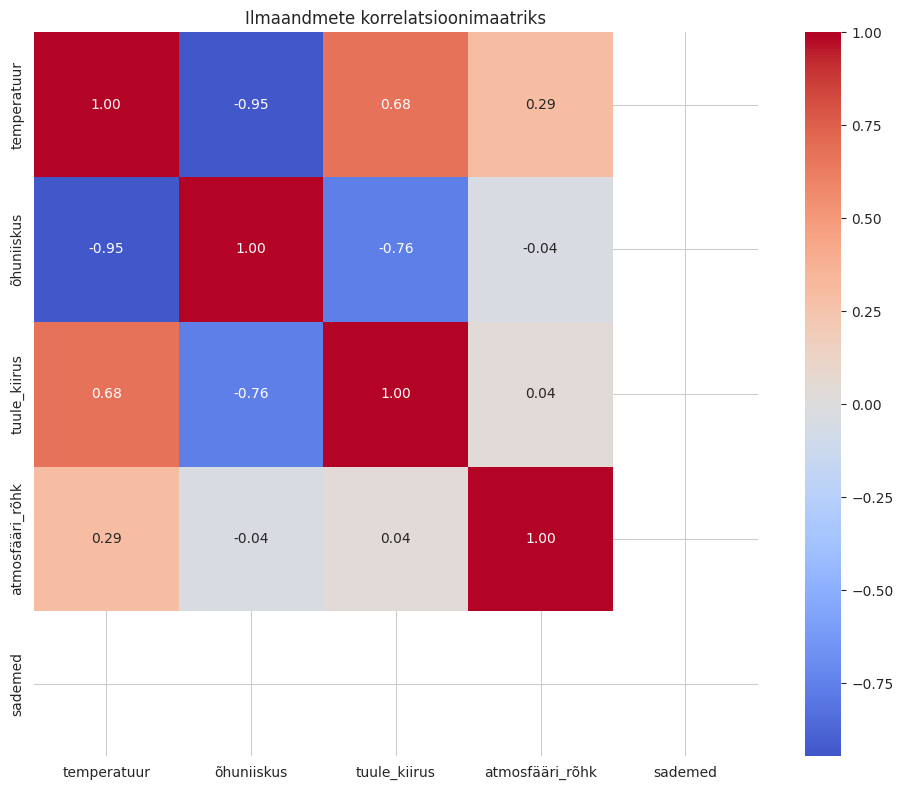

In [7]:
# Seaborn heatmap - korrelatsioonimaatriks
plt.figure(figsize=(10, 8))

# Vali ainult numbrilised veerud korrelatsiooni jaoks
numeric_columns = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numeric_columns].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, fmt='.2f')
plt.title('Ilmaandmete korrelatsioonimaatriks')
plt.tight_layout()
plt.show()


## 5. Aegridade analüüs ja trendide leidmine


In [8]:
# Loo päevade kaupa grupeeritud andmed
daily_stats = df.resample('D').agg({
    'temperatuur': ['min', 'max', 'mean'],
    'õhuniiskus': 'mean',
    'tuule_kiirus': 'max',
    'atmosfääri_rõhk': ['min', 'max', 'mean']
}).round(2)

# Lihtsusta veergude nimesid
daily_stats.columns = ['temp_min', 'temp_max', 'temp_mean', 'niiskus_mean', 
                      'tuul_max', 'rõhk_min', 'rõhk_max', 'rõhk_mean']

print("Päevade kaupa statistika:")
daily_stats


Päevade kaupa statistika:


,temp_min,temp_max,temp_mean,niiskus_mean,tuul_max,rõhk_min,rõhk_max,rõhk_mean
datetime,,,,,,,,
2024-01-15,0.7,7.5,3.38,85.83,15,1005.9,1013.2,1009.42
2024-01-16,0.0,7.1,2.83,90.58,9,998.7,1005.6,1002.15
2024-01-17,-0.2,6.8,2.53,90.46,15,991.5,998.4,994.95
2024-01-18,-0.5,6.3,2.10,90.33,9,984.3,991.2,987.75
2024-01-19,-1.0,5.8,1.60,90.33,15,977.1,984.0,980.55
2024-01-20,-1.5,5.3,1.10,90.33,9,969.9,976.8,973.35
2024-01-21,-2.0,4.8,0.60,90.33,15,962.7,969.6,966.15


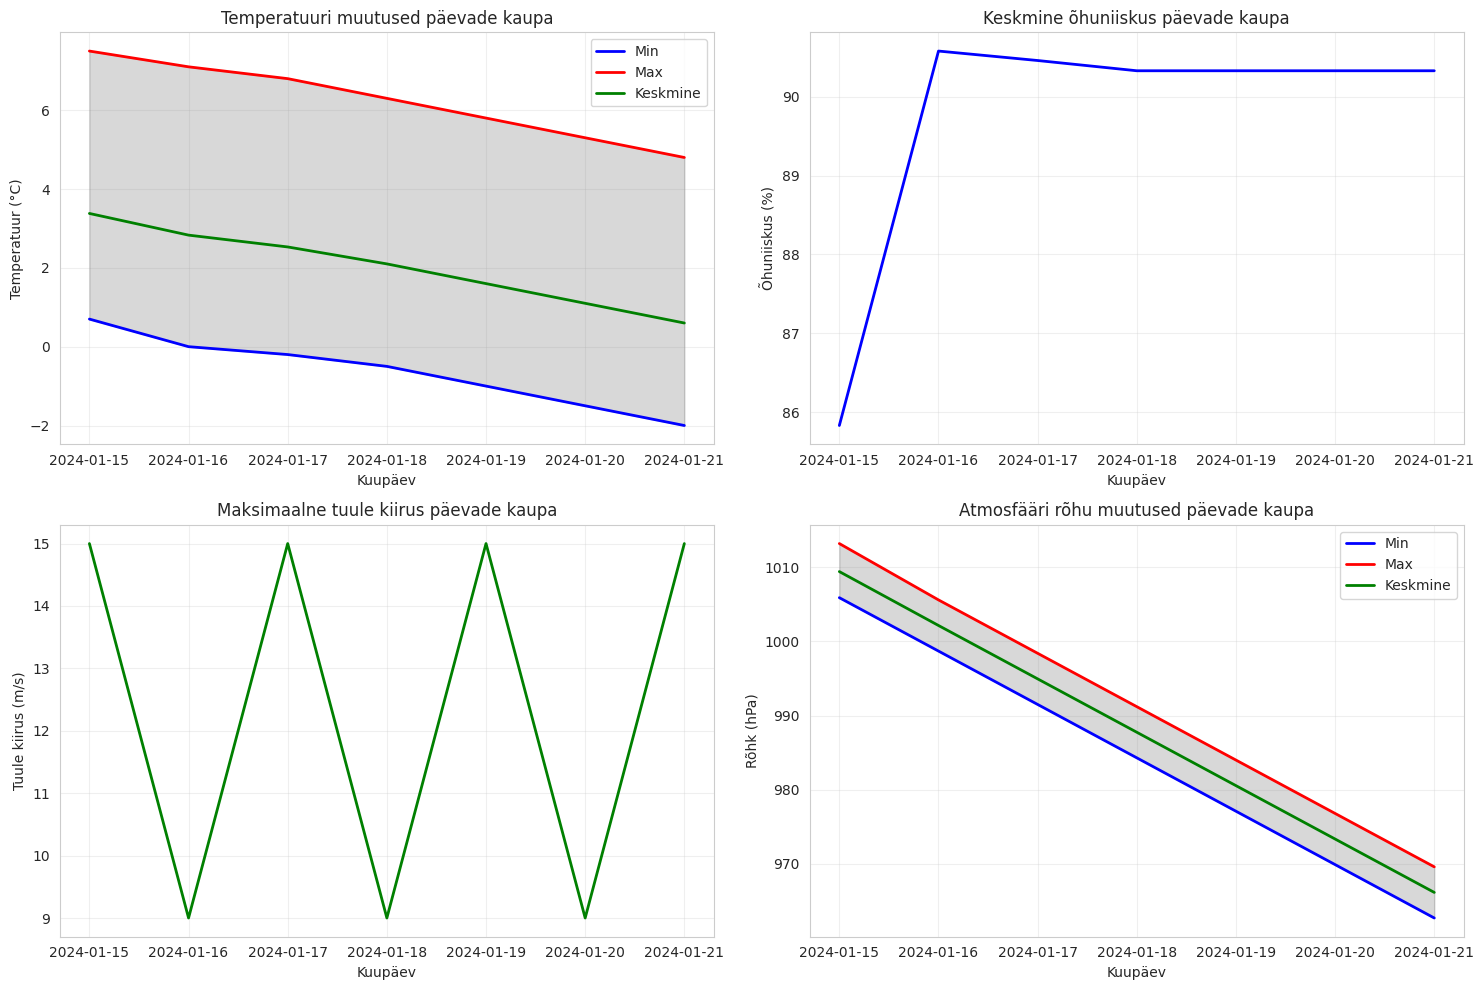

In [9]:
# Visualiseeri päevade kaupa temperatuuri muutused
plt.figure(figsize=(15, 10))

# Temperatuuri min, max, mean
plt.subplot(2, 2, 1)
plt.plot(daily_stats.index, daily_stats['temp_min'], 'b-', label='Min', linewidth=2)
plt.plot(daily_stats.index, daily_stats['temp_max'], 'r-', label='Max', linewidth=2)
plt.plot(daily_stats.index, daily_stats['temp_mean'], 'g-', label='Keskmine', linewidth=2)
plt.fill_between(daily_stats.index, daily_stats['temp_min'], daily_stats['temp_max'], 
                 alpha=0.3, color='gray')
plt.title('Temperatuuri muutused päevade kaupa')
plt.xlabel('Kuupäev')
plt.ylabel('Temperatuur (°C)')
plt.legend()
plt.grid(True, alpha=0.3)

# Õhuniiskus
plt.subplot(2, 2, 2)
plt.plot(daily_stats.index, daily_stats['niiskus_mean'], 'b-', linewidth=2)
plt.title('Keskmine õhuniiskus päevade kaupa')
plt.xlabel('Kuupäev')
plt.ylabel('Õhuniiskus (%)')
plt.grid(True, alpha=0.3)

# Tuule kiirus
plt.subplot(2, 2, 3)
plt.plot(daily_stats.index, daily_stats['tuul_max'], 'g-', linewidth=2)
plt.title('Maksimaalne tuule kiirus päevade kaupa')
plt.xlabel('Kuupäev')
plt.ylabel('Tuule kiirus (m/s)')
plt.grid(True, alpha=0.3)

# Atmosfääri rõhk
plt.subplot(2, 2, 4)
plt.plot(daily_stats.index, daily_stats['rõhk_min'], 'b-', label='Min', linewidth=2)
plt.plot(daily_stats.index, daily_stats['rõhk_max'], 'r-', label='Max', linewidth=2)
plt.plot(daily_stats.index, daily_stats['rõhk_mean'], 'g-', label='Keskmine', linewidth=2)
plt.fill_between(daily_stats.index, daily_stats['rõhk_min'], daily_stats['rõhk_max'], 
                 alpha=0.3, color='gray')
plt.title('Atmosfääri rõhu muutused päevade kaupa')
plt.xlabel('Kuupäev')
plt.ylabel('Rõhk (hPa)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [10]:
# NumPy trendide analüüs
print("=== TRENDIDE ANALÜÜS ===")

# Temperatuuri trend (lineaarne regressioon)
temp_values = df['temperatuur'].values
time_values = np.arange(len(temp_values))
temp_trend = np.polyfit(time_values, temp_values, 1)
print(f"Temperatuuri trend: {temp_trend[0]:.4f} °C/tund")

# Õhuniiskuse trend
niiskus_values = df['õhuniiskus'].values
niiskus_trend = np.polyfit(time_values, niiskus_values, 1)
print(f"Õhuniiskuse trend: {niiskus_trend[0]:.4f} %/tund")

# Atmosfääri rõhu trend
rõhk_values = df['atmosfääri_rõhk'].values
rõhk_trend = np.polyfit(time_values, rõhk_values, 1)
print(f"Atmosfääri rõhu trend: {rõhk_trend[0]:.4f} hPa/tund")

# Tuule kiiruse trend
tuul_values = df['tuule_kiirus'].values
tuul_trend = np.polyfit(time_values, tuul_values, 1)
print(f"Tuule kiiruse trend: {tuul_trend[0]:.4f} m/s/tund")


=== TRENDIDE ANALÜÜS ===
Temperatuuri trend: -0.0155 °C/tund
Õhuniiskuse trend: 0.0064 %/tund
Atmosfääri rõhu trend: -0.3004 hPa/tund
Tuule kiiruse trend: -0.0032 m/s/tund


## 6. Statistilised analüüsid


In [11]:
# Põhistatistika
print("=== PÕHISTATISTIKA ===")
print(f"Temperatuur:")
print(f"  Min: {df['temperatuur'].min():.1f}°C")
print(f"  Max: {df['temperatuur'].max():.1f}°C")
print(f"  Keskmine: {df['temperatuur'].mean():.1f}°C")
print(f"  Standardhälve: {df['temperatuur'].std():.1f}°C")

print(f"\nÕhuniiskus:")
print(f"  Min: {df['õhuniiskus'].min():.1f}%")
print(f"  Max: {df['õhuniiskus'].max():.1f}%")
print(f"  Keskmine: {df['õhuniiskus'].mean():.1f}%")
print(f"  Standardhälve: {df['õhuniiskus'].std():.1f}%")

print(f"\nTuule kiirus:")
print(f"  Min: {df['tuule_kiirus'].min():.1f} m/s")
print(f"  Max: {df['tuule_kiirus'].max():.1f} m/s")
print(f"  Keskmine: {df['tuule_kiirus'].mean():.1f} m/s")
print(f"  Standardhälve: {df['tuule_kiirus'].std():.1f} m/s")

print(f"\nAtmosfääri rõhk:")
print(f"  Min: {df['atmosfääri_rõhk'].min():.1f} hPa")
print(f"  Max: {df['atmosfääri_rõhk'].max():.1f} hPa")
print(f"  Keskmine: {df['atmosfääri_rõhk'].mean():.1f} hPa")
print(f"  Standardhälve: {df['atmosfääri_rõhk'].std():.1f} hPa")


=== PÕHISTATISTIKA ===
Temperatuur:
  Min: -2.0°C
  Max: 7.5°C
  Keskmine: 2.0°C
  Standardhälve: 2.6°C

Õhuniiskus:
  Min: 72.0%
  Max: 100.0%
  Keskmine: 89.7%
  Standardhälve: 8.6%

Tuule kiirus:
  Min: 0.0 m/s
  Max: 15.0 m/s
  Keskmine: 6.9 m/s
  Standardhälve: 4.1 m/s

Atmosfääri rõhk:
  Min: 962.7 hPa
  Max: 1013.2 hPa
  Keskmine: 987.8 hPa
  Standardhälve: 14.6 hPa


In [12]:
# Korrelatsioonide analüüs
print("=== KORRELATSIOONID ===")
print("Temperatuuri ja õhuniiskuse korrelatsioon:", 
      df['temperatuur'].corr(df['õhuniiskus']))
print("Temperatuuri ja atmosfääri rõhu korrelatsioon:", 
      df['temperatuur'].corr(df['atmosfääri_rõhk']))
print("Õhuniiskuse ja atmosfääri rõhu korrelatsioon:", 
      df['õhuniiskus'].corr(df['atmosfääri_rõhk']))
print("Tuule kiiruse ja atmosfääri rõhu korrelatsioon:", 
      df['tuule_kiirus'].corr(df['atmosfääri_rõhk']))

# Näita kõiki numbrilisi veerge
print(f"\nNumbrilised veerud: {list(df.select_dtypes(include=[np.number]).columns)}")
print(f"String veerud: {list(df.select_dtypes(include=['object']).columns)}")


=== KORRELATSIOONID ===
Temperatuuri ja õhuniiskuse korrelatsioon: -0.9464227006019172
Temperatuuri ja atmosfääri rõhu korrelatsioon: 0.2941051577924928
Õhuniiskuse ja atmosfääri rõhu korrelatsioon: -0.035734390019776074
Tuule kiiruse ja atmosfääri rõhu korrelatsioon: 0.03769201595310061

Numbrilised veerud: ['temperatuur', 'õhuniiskus', 'tuule_kiirus', 'atmosfääri_rõhk', 'sademed']
String veerud: ['tuule_suund']


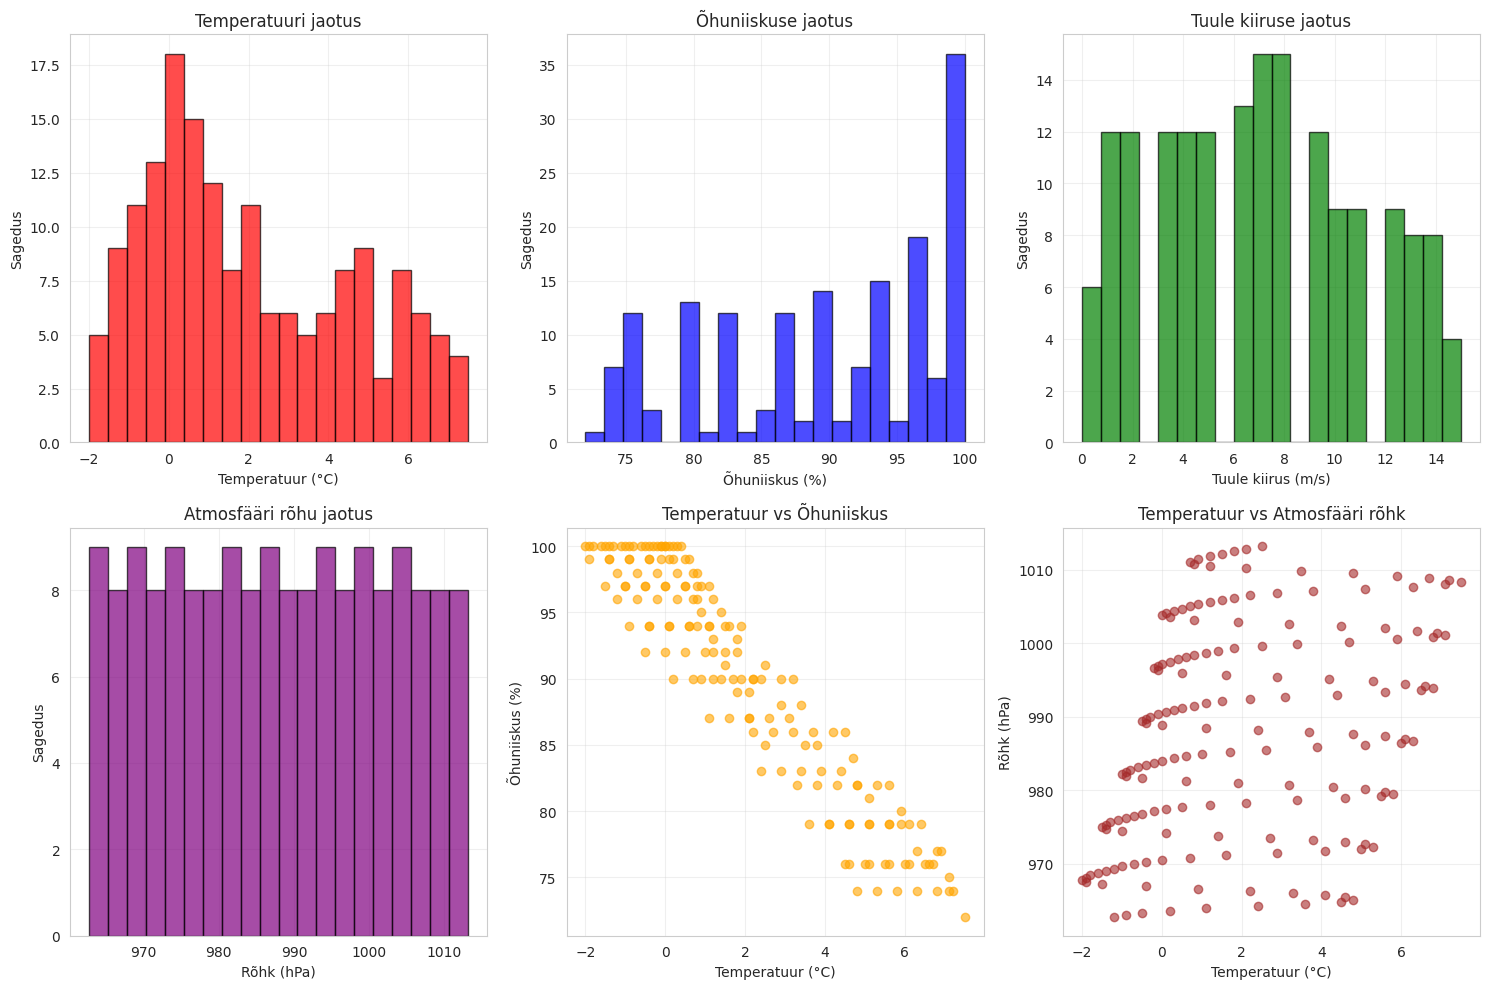

In [13]:
# Histogrammid ja jaotused
plt.figure(figsize=(15, 10))

# Temperatuuri histogramm
plt.subplot(2, 3, 1)
plt.hist(df['temperatuur'], bins=20, alpha=0.7, color='red', edgecolor='black')
plt.title('Temperatuuri jaotus')
plt.xlabel('Temperatuur (°C)')
plt.ylabel('Sagedus')
plt.grid(True, alpha=0.3)

# Õhuniiskuse histogramm
plt.subplot(2, 3, 2)
plt.hist(df['õhuniiskus'], bins=20, alpha=0.7, color='blue', edgecolor='black')
plt.title('Õhuniiskuse jaotus')
plt.xlabel('Õhuniiskus (%)')
plt.ylabel('Sagedus')
plt.grid(True, alpha=0.3)

# Tuule kiiruse histogramm
plt.subplot(2, 3, 3)
plt.hist(df['tuule_kiirus'], bins=20, alpha=0.7, color='green', edgecolor='black')
plt.title('Tuule kiiruse jaotus')
plt.xlabel('Tuule kiirus (m/s)')
plt.ylabel('Sagedus')
plt.grid(True, alpha=0.3)

# Atmosfääri rõhu histogramm
plt.subplot(2, 3, 4)
plt.hist(df['atmosfääri_rõhk'], bins=20, alpha=0.7, color='purple', edgecolor='black')
plt.title('Atmosfääri rõhu jaotus')
plt.xlabel('Rõhk (hPa)')
plt.ylabel('Sagedus')
plt.grid(True, alpha=0.3)

# Scatter plot - temperatuur vs õhuniiskus
plt.subplot(2, 3, 5)
plt.scatter(df['temperatuur'], df['õhuniiskus'], alpha=0.6, color='orange')
plt.title('Temperatuur vs Õhuniiskus')
plt.xlabel('Temperatuur (°C)')
plt.ylabel('Õhuniiskus (%)')
plt.grid(True, alpha=0.3)

# Scatter plot - temperatuur vs atmosfääri rõhk
plt.subplot(2, 3, 6)
plt.scatter(df['temperatuur'], df['atmosfääri_rõhk'], alpha=0.6, color='brown')
plt.title('Temperatuur vs Atmosfääri rõhk')
plt.xlabel('Temperatuur (°C)')
plt.ylabel('Rõhk (hPa)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## 7. Andmete eksportimine


In [14]:
# Ekspordi puhastatud andmed
df_clean = df.copy()
df_clean.to_csv('ilmaandmed_puhastatud.csv', encoding='utf-8')

# Ekspordi päevade kaupa statistika
daily_stats.to_csv('ilmaandmed_päevade_statistika.csv', encoding='utf-8')

# Ekspordi korrelatsioonimaatriks
correlation_matrix.to_csv('ilmaandmed_korrelatsioonid.csv', encoding='utf-8')

print("Andmed on eksporditud:")
print("- ilmaandmed_puhastatud.csv")
print("- ilmaandmed_päevade_statistika.csv") 
print("- ilmaandmed_korrelatsioonid.csv")


Andmed on eksporditud:
- ilmaandmed_puhastatud.csv
- ilmaandmed_päevade_statistika.csv
- ilmaandmed_korrelatsioonid.csv


## 8. Iseseisvad Ülesanded

Nüüd on aeg proovida oma teadmisi! Lahenda järgmised ülesanded:


### Ülesanne 1: Temperatuuri ekstremumid

Leia ja visualiseeri:
1. **Kõige kõrgem temperatuur** - millal ja mis temperatuur?
2. **Kõige madalam temperatuur** - millal ja mis temperatuur?
3. **Temperatuuri vahe** - kui suur on erinevus kõrgeima ja madalaima vahel?
4. **Temperatuuri kõikumine** - millal oli temperatuur kõige stabiilsem (väikseim standardhälve)?

**Vihje:** Kasuta `df['temperatuur'].idxmax()`, `df['temperatuur'].idxmin()`, `df['temperatuur'].std()`


### Ülesanne 2: Tuule analüüs

Analüüsi tuule andmeid:
1. **Tuule suundade jaotus** - milline tuule suund on kõige tavalisem?
2. **Tuule kiiruse ja temperatuuri seos** - kas tugev tuul mõjutab temperatuuri?
3. **Tuule kiiruse trend** - kas tuul tugevneb või nõrgeneb aja jooksul?
4. **Tuule kiiruse histogramm** - kuidas jaotub tuule kiirus?

**Vihje:** Kasuta `df['tuule_suund'].value_counts()`, `df['tuule_kiirus'].corr(df['temperatuur'])`


### Ülesanne 3: Päevade võrdlus

Võrdle erinevaid päevi:
1. **Kõige soojem päev** - millal oli kõige kõrgem keskmine temperatuur?
2. **Kõige niiskem päev** - millal oli kõige kõrgem õhuniiskus?
3. **Kõige tuulisem päev** - millal puhus kõige tugevamalt?
4. **Päevade võrdlusgraafik** - tee graafik, mis näitab kõiki päevi kõrvuti

**Vihje:** Kasuta `daily_stats` andmeid, mis on juba loodud


### Ülesanne 4: Andmete eksportimine ja kokkuvõte

Loo lõplik analüüs:
1. **Kokkuvõtte tabel** - tee tabel, mis näitab kõiki olulisi statistikasid
2. **Ekspordi tulemused** - salvesta analüüsi tulemused eraldi failidesse
3. **Loo aruanne** - kirjuta lühike tekst, mis kirjeldab ilmaandmete põhitendeid
4. **Soovitused** - mida võiks veel analüüsida?

**Vihje:** Kasuta `df.describe()`, `df.to_csv()`, `plt.savefig()`


### Ülesande lahendamise vihjed

**Kui oled kinni jäänud:**
1. Vaata tagasi notebook'i alguses olevaid näiteid
2. Kasuta `df.head()`, `df.info()`, `df.describe()` andmete uurimiseks
3. Eksperimenteeri erinevate graafikutüüpidega: `plt.plot()`, `plt.scatter()`, `plt.hist()`
4. Kasuta `help()` funktsiooni, näiteks `help(df.corr)`

**Kasulikud käsud:**
```python
# Andmete uurimine
df.head()
df.info()
df.describe()

# Statistika
df['temperatuur'].max()
df['temperatuur'].min()
df['temperatuur'].mean()
df['temperatuur'].std()

# Graafikud
plt.plot(df.index, df['temperatuur'])
plt.scatter(df['temperatuur'], df['õhuniiskus'])
plt.hist(df['temperatuur'])

# Korrelatsioon
df['temperatuur'].corr(df['õhuniiskus'])
```
